In [1]:
import pickle
import networkx as nx
import numpy as np
import pandas as pd

In [4]:
file = open('NetSense_network.pkl', 'rb')
# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')

cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item)
    cnt += 1

Showing the pickled data:
The data  0  is :  1
The data  1  is :  2
The data  2  is :  3
The data  3  is :  4
The data  4  is :  5
The data  5  is :  6


In [5]:
data[6].nodes[75261]['hometown_1']

1

In [6]:
for node in data[6].nodes:
    node['hometown_1']

TypeError: 'int' object is not subscriptable

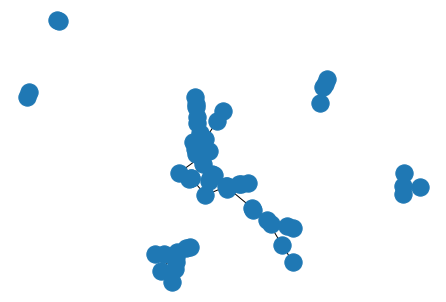

In [7]:
nx.draw(data[6])

In [8]:
data[1].nodes.data()

NodeDataView({75178: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 2, 'premaritalsex_': 3, 'euthanasia_': 3, 'deathpen_': 3, 'gaymarriage_': 3, 'marijuana_': 2, 'political_': 1, 'abortion_': 3, 'homosexual_': 3}, 30952: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 2, 'premaritalsex_': 2, 'euthanasia_': 2, 'deathpen_': 2, 'gaymarriage_': 1, 'marijuana_': 3, 'political_': 1, 'abortion_': 2, 'homosexual_': 2}, 13116: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 3, 'deathpen_': 3, 'gaymarriage_': 3, 'marijuana_': 3, 'political_': 3, 'abortion_': 3, 'homosexual_': 1}, 62555: {'age_1': 2, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 1, 'deathpen_': 1, 'gaymarriage_': 3, 'marijuana_': 2, 'political_': 3, 'abortion_': 3, 'homosexual_': 3}, 26999: {'age_1': 2, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 1, 'deathpen_': 2, 'gaymarri

In [15]:
#creating list of attributes
list_of_attributes = set([k for n in data[1].nodes for k in data[1].nodes[n].keys()])

#creating possible attribute values
attribute_values = dict((attribute, set() ) for attribute in list_of_attributes)

for sem in range(1,7):
    for node in data[sem].nodes():
        for attribute in list_of_attributes:
            attribute_values[attribute].add(data[sem].nodes[node][attribute])

attribute_values

#To apply PCA or other analysis on all attributes (i.e. including ethnicity) 
#one would have to create an attribute for each race, that is is_1, is_2 etc. 
#Because this attribute is not ordered. 

{'age_1': {1, 2},
 'gaymarriage_': {1, 2, 3},
 'political_': {1, 2, 3},
 'abortion_': {1, 2, 3},
 'premaritalsex_': {1, 2, 3},
 'hometown_1': {1, 2, 3},
 'ethnicity_1': {1, 2, 3, 4},
 'deathpen_': {1, 2, 3},
 'gender_1': {1, 2},
 'homosexual_': {1, 2, 3},
 'marijuana_': {1, 2, 3},
 'euthanasia_': {1, 2, 3}}

In [10]:
#creating table of attribute values
attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    attributes[i] = np.zeros([len(data[i].nodes), len(list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(list_of_attributes):
            attributes[sem][i,j] = data[sem].nodes[node][attribute]

In [11]:
attributes

{1: array([[1., 3., 1., ..., 3., 2., 3.],
        [1., 1., 1., ..., 2., 3., 2.],
        [1., 3., 3., ..., 1., 3., 3.],
        ...,
        [2., 1., 2., ..., 1., 1., 2.],
        [2., 2., 1., ..., 1., 1., 2.],
        [2., 3., 2., ..., 3., 3., 3.]]),
 2: array([[2., 1., 1., ..., 1., 1., 3.],
        [2., 1., 1., ..., 1., 1., 1.],
        [1., 3., 1., ..., 3., 1., 3.],
        ...,
        [1., 3., 1., ..., 3., 1., 1.],
        [1., 3., 1., ..., 3., 1., 3.],
        [1., 3., 3., ..., 3., 1., 2.]]),
 3: array([[1., 3., 2., 3., 3., 2., 1., 1., 2., 3., 1., 3.],
        [1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.],
        [2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 3., 1.],
        [1., 3., 3., 1., 3., 1., 3., 3., 2., 3., 3., 3.],
        [2., 3., 1., 3., 3., 1., 1., 1., 1., 3., 2., 3.],
        [1., 3., 2., 3., 1., 1., 2., 1., 2., 1., 1., 3.],
        [1., 3., 1., 1., 3., 2., 1., 1., 1., 3., 2., 2.],
        [2., 3., 3., 3., 3., 2., 1., 1., 2., 3., 1., 2.],
        [1., 1., 1., 1., 1., 

In [98]:
import mca


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [102]:
df = pd.DataFrame(data=attributes[1], columns=attribute_values)
print(df)

    political_  gender_1  homosexual_  gaymarriage_  abortion_  hometown_1  \
0          1.0       2.0          3.0           3.0        3.0         1.0   
1          1.0       2.0          2.0           1.0        2.0         1.0   
2          3.0       1.0          1.0           3.0        3.0         1.0   
3          3.0       1.0          3.0           3.0        3.0         1.0   
4          2.0       1.0          3.0           2.0        3.0         1.0   
..         ...       ...          ...           ...        ...         ...   
93         1.0       1.0          1.0           1.0        1.0         2.0   
94         3.0       2.0          3.0           1.0        3.0         1.0   
95         2.0       1.0          1.0           1.0        1.0         1.0   
96         1.0       2.0          1.0           2.0        1.0         3.0   
97         2.0       1.0          3.0           3.0        3.0         1.0   

    euthanasia_  deathpen_  ethnicity_1  age_1  premaritalsex_ 

In [109]:
mca_counts = mca.MCA(df, ncols = len(attribute_values))
# print(mca_counts.fs_r(1))
print(mca_counts.L)

[0 0 0 0 0 0 0 0 0 0 0 0]


# PCA
Trying simple PCA, although it is not recommended. To do it we need to remove categorical data first. 

In [18]:

ord_list_of_attributes = list_of_attributes - {'ethnicity_1', 'gender_1', 'hometown_1', 'age_1'}
print(ord_list_of_attributes)

#creating table of attribute values
ord_attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    ord_attributes[i] = np.zeros([len(data[i].nodes), len(ord_list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(ord_list_of_attributes):
            ord_attributes[sem][i,j] = data[sem].nodes[node][attribute]
print(ord_attributes)

{'gaymarriage_', 'abortion_', 'political_', 'premaritalsex_', 'deathpen_', 'homosexual_', 'marijuana_', 'euthanasia_'}
{1: array([[3., 3., 1., 3., 3., 3., 2., 3.],
       [1., 2., 1., 2., 2., 2., 3., 2.],
       [3., 3., 3., 3., 3., 1., 3., 3.],
       [3., 3., 3., 3., 1., 3., 2., 1.],
       [2., 3., 2., 3., 2., 3., 1., 1.],
       [1., 1., 2., 1., 1., 1., 1., 3.],
       [2., 1., 1., 1., 2., 2., 1., 1.],
       [2., 2., 2., 1., 2., 1., 3., 2.],
       [3., 3., 2., 3., 1., 3., 2., 3.],
       [3., 1., 3., 3., 1., 3., 3., 1.],
       [1., 1., 2., 1., 1., 1., 2., 3.],
       [2., 1., 1., 1., 1., 1., 1., 1.],
       [3., 1., 1., 3., 1., 3., 3., 2.],
       [1., 1., 1., 1., 1., 2., 3., 1.],
       [3., 1., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 2., 1., 2., 2., 3.],
       [1., 1., 1., 3., 2., 1., 2., 2.],
       [1., 1., 1., 1., 3., 1., 3., 3.],
       [3., 3., 3., 2., 2., 3., 3., 3.],
       [3., 1., 1., 3., 1., 1., 3., 3.],
       [3., 3., 1., 3., 3., 3., 3., 3.],
       [3., 3., 

In [28]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(ord_attributes[1])
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.47038187 0.11940998 0.10246659 0.08957861 0.07116288 0.06436994
 0.05160825 0.03102189]
[17.11639876  8.62397378  7.98873919  7.46946095  6.65754145  6.33182142
  5.66952482  4.39563096]


In [29]:
pca.components_

array([[-0.39901144, -0.41745007, -0.3241474 , -0.41769261, -0.12955624,
        -0.48425964, -0.27084   , -0.24968005],
       [-0.2101619 ,  0.07033197, -0.43714941,  0.23690543,  0.65333018,
        -0.09174305, -0.22128266,  0.46844261],
       [-0.30548031, -0.13639703,  0.10379584, -0.05748098, -0.07401475,
        -0.28540519,  0.77893658,  0.42464514],
       [ 0.34976814, -0.2445525 , -0.37576774, -0.08070223, -0.52764789,
         0.17738585, -0.16178306,  0.57800543],
       [-0.13087866,  0.67667811,  0.17894791, -0.58494095, -0.08275739,
        -0.10553723, -0.2090991 ,  0.29847934],
       [-0.40466446, -0.06968337,  0.476098  ,  0.49896288, -0.31818028,
        -0.16015638, -0.41560726,  0.23693772],
       [-0.46445726,  0.41052265, -0.5095246 ,  0.25563998, -0.37499853,
         0.27344745,  0.16193395, -0.2217284 ],
       [ 0.42937486,  0.33331801, -0.18315813,  0.32112321, -0.15418497,
        -0.72978919,  0.04570879, -0.09702961]])

# Checking correlation for PCA transformed variables

In [1]:
pca.components_[0]*ord_attributes

NameError: name 'pca' is not defined

In [34]:
np.sum(pca.components_[0]*ord_attributes[1],1)/8

array([-0.8948472 , -0.61661951, -0.88867414, -0.88107497, -0.77301965,
       -0.43951812, -0.4631831 , -0.59427033, -0.90297656, -0.81056746,
       -0.47337312, -0.38645611, -0.76074061, -0.46482214, -0.90537653,
       -0.54559873, -0.52226237, -0.49909875, -0.94133294, -0.67088571,
       -0.9287022 , -0.97734999, -0.79195062, -0.97734999, -0.88582936,
       -0.37043468, -0.48939455, -0.38662921, -0.50473865, -0.41095311,
       -0.41761653, -0.97734999, -0.84479766, -0.889182  , -0.66033589,
       -0.33657968, -0.72417998, -0.88695513, -0.96922062, -0.36896874,
       -0.39899969, -0.5626077 , -0.7950084 , -0.33657968, -0.40017875,
       -0.99354452, -0.50342285, -0.72424062, -0.92583451, -0.33657968,
       -0.77642188, -0.96233451, -0.86099219, -0.43633254, -0.89462451,
       -0.87960903, -0.36778969, -0.36778969, -0.92583451, -0.95968952,
       -0.6521697 , -0.38645611, -0.79521267, -0.74285746, -0.52203969,
       -0.84177746, -0.79861404, -0.69303061, -0.56949381, -0.72

In [48]:
max_dif = abs(np.sum([3,3,3,3,3,3,3,3] * pca.components_[0]) - np.sum(np.ones(8) * pca.components_[0]))/8
min_dif = 0
max_dif

0.6731593640729352

In [49]:
def calc_link_polarity(agent1, agent2, th, attr_dif = max_dif):
    return np.sum(np.abs(agent1 - agent2) / attr_dif ) / len(agent1) <= th

def calc_link_polarities(agents, th, attr_dif = max_dif):
    N, A = agents.shape
    
    polarities = np.zeros([N,N])
    
    for i in range(0,N):
        for j in range(i+1,N):
            if calc_link_polarity(agents[i,:], agents[j,:], th, attr_dif):
                polarities[i,j] = 1 
            else:
                polarities[i,j] = -1
            polarities[j,i] = polarities[i, j]
    return polarities

def balanced_triad_density(polarities):
    N = polarities.shape[0]
    return (np.sum(np.matmul(polarities,polarities) * polarities) / 6 / (N*(N-1)*(N-2)/6) + 1)/2

In [58]:
polarities = calc_link_polarities(ord_attributes[6], 0.5)
balanced_triad_density(polarities)

0.2404119765304324

In [59]:
def balanced_triad_density_network(polarities, triads):
    T = len(triads)
    dens = 0.
    for triad in triads:
        i, j, k = triad
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            dens = dens + 1
    dens = dens / T
    return dens

def get_triads_polarity(polarities, triads):
    Ts = len(triads)
    
    t_pol = np.zeros(Ts) 
    t_pol_type = np.zeros(Ts)
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        pols = [polarities[i,j], polarities[i,k], polarities[k,j]]
        
        t_pol_type[t] = 3-(sum(pols)+3)/2
        
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            t_pol[t] = 1
        else:
            t_pol[t] = -1
    
    return t_pol, t_pol_type

def count_triads_types(polarities, triads):
    t_pol, t_pol_type = get_triads_polarity(polarities, triads)
    
    t2 = np.array(t_pol_type)
    triads_type = [sum(t2 == i) for i in range(0,4)]
    
    return triads_type


In [60]:
def get_triads(net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]

    triads = []

    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] > 0:
                for k in range(j+1,N):
                    if A[i,k] > 0 and A[j,k] > 0:
                        triads.append((i,j,k))
    
    return triads

def get_triads_strength(triads, net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]
    Ts = len(triads)
    
    s_mul = np.zeros(Ts) #multiplicative strength
    s_add = np.zeros(Ts) #additive strength
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        s_mul[t] = A[i,j] * A[i,k] * A[j,k]
        s_add[t] = A[i,j] + A[i,k] + A[j,k]
    
    return s_mul, s_add

In [73]:
sem = 6
triads = get_triads(data[sem])

polarities = calc_link_polarities(ord_attributes[sem], 0.7)

balanced_triad_density_network(polarities, triads), balanced_triad_density(polarities)

(0.5, 0.3799451033718617)